In [1]:
# ImageNet, 10, 100, 1000

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2023-05-25 17:02:42.666043: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# cifar10 
(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 32s 0us/step


In [4]:
x_train_all.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

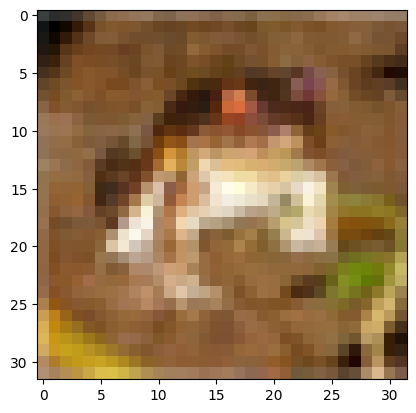

In [6]:
plt.imshow(x_train_all[0])

In [7]:
y_train_all[0]

array([6], dtype=uint8)

In [8]:
x_test[0]

array([[[158, 112,  49],
        [159, 111,  47],
        [165, 116,  51],
        ...,
        [137,  95,  36],
        [126,  91,  36],
        [116,  85,  33]],

       [[152, 112,  51],
        [151, 110,  40],
        [159, 114,  45],
        ...,
        [136,  95,  31],
        [125,  91,  32],
        [119,  88,  34]],

       [[151, 110,  47],
        [151, 109,  33],
        [158, 111,  36],
        ...,
        [139,  98,  34],
        [130,  95,  34],
        [120,  89,  33]],

       ...,

       [[ 68, 124, 177],
        [ 42, 100, 148],
        [ 31,  88, 137],
        ...,
        [ 38,  97, 146],
        [ 13,  64, 108],
        [ 40,  85, 127]],

       [[ 61, 116, 168],
        [ 49, 102, 148],
        [ 35,  85, 132],
        ...,
        [ 26,  82, 130],
        [ 29,  82, 126],
        [ 20,  64, 107]],

       [[ 54, 107, 160],
        [ 56, 105, 149],
        [ 45,  89, 132],
        ...,
        [ 24,  77, 124],
        [ 34,  84, 129],
        [ 21,  67, 110]]

In [9]:
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 32, 32, 3)
x_valid_scaled = scaler.transform(x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 32, 32, 3)
x_test_scaled = scaler.transform(x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 32, 32, 3)

In [13]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

2023-05-25 17:07:42.670990: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
# 네트워크
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['acc'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 1,707,274
Trainable params: 1,707,274
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model.fit(x_train_scaled, y_train, epochs=10,
         validation_data=(x_valid_scaled, y_valid))

Epoch 1/10
1407/1407 [==============================] - 11s 7ms/step - loss: 1.7699 - acc: 0.3844 - val_loss: 1.6270 - val_acc: 0.4308
Epoch 2/10
1407/1407 [==============================] - 10s 7ms/step - loss: 1.5382 - acc: 0.4576 - val_loss: 1.5430 - val_acc: 0.4668
Epoch 3/10
1407/1407 [==============================] - 10s 7ms/step - loss: 1.4443 - acc: 0.4890 - val_loss: 1.5066 - val_acc: 0.4686
Epoch 4/10
1407/1407 [==============================] - 10s 7ms/step - loss: 1.3763 - acc: 0.5123 - val_loss: 1.4648 - val_acc: 0.4916
Epoch 5/10
1407/1407 [==============================] - 10s 7ms/step - loss: 1.3080 - acc: 0.5388 - val_loss: 1.4821 - val_acc: 0.4970
Epoch 6/10
1407/1407 [==============================] - 10s 7ms/step - loss: 1.2467 - acc: 0.5579 - val_loss: 1.4634 - val_acc: 0.5058
Epoch 7/10
1407/1407 [==============================] - 10s 7ms/step - loss: 1.1892 - acc: 0.5799 - val_loss: 1.4770 - val_acc: 0.5112
Epoch 8/10
1407/1407 [==============================] -

In [ ]:
# 결과는 안 좋습니다.

In [17]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               1573376   
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 dense_6 (Dense)             (None, 512)               262656    
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dense_8 (Dense)             (None, 512)              

In [18]:
history = model.fit(x_train_scaled, y_train, epochs=10,
         validation_data=(x_valid_scaled, y_valid))

Epoch 1/10
1407/1407 [==============================] - 41s 28ms/step - loss: 2.3040 - acc: 0.0973 - val_loss: 2.3028 - val_acc: 0.0972
Epoch 2/10
1407/1407 [==============================] - 40s 28ms/step - loss: 2.3028 - acc: 0.0999 - val_loss: 2.3027 - val_acc: 0.0996
Epoch 3/10
1407/1407 [==============================] - 41s 29ms/step - loss: 2.3028 - acc: 0.0989 - val_loss: 2.3026 - val_acc: 0.0996
Epoch 4/10
1407/1407 [==============================] - 45s 32ms/step - loss: 2.3028 - acc: 0.0967 - val_loss: 2.3026 - val_acc: 0.0976
Epoch 5/10
1407/1407 [==============================] - 42s 30ms/step - loss: 2.3027 - acc: 0.0991 - val_loss: 2.3029 - val_acc: 0.0920
Epoch 6/10
1407/1407 [==============================] - 42s 30ms/step - loss: 2.3028 - acc: 0.1002 - val_loss: 2.3026 - val_acc: 0.0972
Epoch 7/10
1407/1407 [==============================] - 42s 30ms/step - loss: 2.3028 - acc: 0.0982 - val_loss: 2.3028 - val_acc: 0.0972
Epoch 8/10
1407/1407 [==========================

In [20]:
# 결론: 가능하면 심층 신경망을 사용하지 않는 것이 좋습니다.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               786688    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 256)              

In [24]:
# 过拟合问题
# l1
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(tf.keras.layers.Dense(512, activation='relu', kernel_regularizer='l1'))
model.add(tf.keras.layers.Dense(256, activation='relu', kernel_regularizer='l1'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['acc'])
history = model.fit(x_train_scaled, y_train, epochs=10,
         validation_data=(x_valid_scaled, y_valid))

Epoch 1/10
1407/1407 [==============================] - 6s 4ms/step - loss: 31.1631 - acc: 0.1824 - val_loss: 4.0052 - val_acc: 0.1946
Epoch 2/10
1407/1407 [==============================] - 5s 4ms/step - loss: 4.0107 - acc: 0.1778 - val_loss: 3.9911 - val_acc: 0.1830
Epoch 3/10
1407/1407 [==============================] - 5s 4ms/step - loss: 3.9813 - acc: 0.1820 - val_loss: 3.9776 - val_acc: 0.1872
Epoch 4/10
1407/1407 [==============================] - 5s 4ms/step - loss: 3.9784 - acc: 0.1788 - val_loss: 3.9641 - val_acc: 0.1924
Epoch 5/10
1407/1407 [==============================] - 5s 4ms/step - loss: 4.0195 - acc: 0.1843 - val_loss: 4.0085 - val_acc: 0.1940
Epoch 6/10
1407/1407 [==============================] - 5s 4ms/step - loss: 4.0018 - acc: 0.1812 - val_loss: 3.9729 - val_acc: 0.1990
Epoch 7/10
1407/1407 [==============================] - 5s 4ms/step - loss: 3.9764 - acc: 0.1893 - val_loss: 3.9822 - val_acc: 0.1776
Epoch 8/10
1407/1407 [==============================] - 5s 4m

In [25]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(tf.keras.layers.Dense(512, activation='relu', kernel_regularizer='l2'))
model.add(tf.keras.layers.Dense(256, activation='relu', kernel_regularizer='l2'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['acc'])
history = model.fit(x_train_scaled, y_train, epochs=10,
         validation_data=(x_valid_scaled, y_valid))

Epoch 1/10
1407/1407 [==============================] - 6s 4ms/step - loss: 5.6644 - acc: 0.3189 - val_loss: 1.9867 - val_acc: 0.3638
Epoch 2/10
1407/1407 [==============================] - 5s 4ms/step - loss: 1.9784 - acc: 0.3720 - val_loss: 1.9804 - val_acc: 0.3722
Epoch 3/10
1407/1407 [==============================] - 5s 4ms/step - loss: 1.9458 - acc: 0.3866 - val_loss: 1.9553 - val_acc: 0.3730
Epoch 4/10
1407/1407 [==============================] - 5s 4ms/step - loss: 1.9147 - acc: 0.3966 - val_loss: 1.8764 - val_acc: 0.4066
Epoch 5/10
1407/1407 [==============================] - 5s 4ms/step - loss: 1.8796 - acc: 0.4035 - val_loss: 1.8419 - val_acc: 0.4044
Epoch 6/10
1407/1407 [==============================] - 5s 4ms/step - loss: 1.8240 - acc: 0.4164 - val_loss: 1.8216 - val_acc: 0.4062
Epoch 7/10
1407/1407 [==============================] - 5s 4ms/step - loss: 1.8037 - acc: 0.4174 - val_loss: 1.7871 - val_acc: 0.4144
Epoch 8/10
1407/1407 [==============================] - 5s 4ms

In [27]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.AlphaDropout(0.5))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['acc'])
history = model.fit(x_train_scaled, y_train, epochs=10,
         validation_data=(x_valid_scaled, y_valid))

Epoch 1/10
1407/1407 [==============================] - 5s 4ms/step - loss: 2.1603 - acc: 0.2885 - val_loss: 1.8486 - val_acc: 0.3868
Epoch 2/10
1407/1407 [==============================] - 5s 4ms/step - loss: 1.7137 - acc: 0.3895 - val_loss: 1.7795 - val_acc: 0.4268
Epoch 3/10
1407/1407 [==============================] - 5s 3ms/step - loss: 1.6381 - acc: 0.4159 - val_loss: 1.7992 - val_acc: 0.4536
Epoch 4/10
1407/1407 [==============================] - 5s 4ms/step - loss: 1.5823 - acc: 0.4383 - val_loss: 1.8421 - val_acc: 0.4460
Epoch 5/10
1407/1407 [==============================] - 5s 4ms/step - loss: 1.5712 - acc: 0.4429 - val_loss: 1.8735 - val_acc: 0.4518
Epoch 6/10
1407/1407 [==============================] - 5s 4ms/step - loss: 1.5261 - acc: 0.4647 - val_loss: 1.7844 - val_acc: 0.4790
Epoch 7/10
1407/1407 [==============================] - 5s 3ms/step - loss: 1.5034 - acc: 0.4687 - val_loss: 1.7914 - val_acc: 0.4730
Epoch 8/10
1407/1407 [==============================] - 5s 4ms

In [28]:
# BN
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(tf.keras.layers.Dense(512))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.AlphaDropout(0.5))
model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['acc'])
history = model.fit(x_train_scaled, y_train, epochs=10,
         validation_data=(x_valid_scaled, y_valid))

Epoch 1/10
1407/1407 [==============================] - 9s 6ms/step - loss: 2.0801 - acc: 0.2586 - val_loss: 1.8591 - val_acc: 0.4018
Epoch 2/10
1407/1407 [==============================] - 8s 6ms/step - loss: 1.8096 - acc: 0.3481 - val_loss: 1.8037 - val_acc: 0.4154
Epoch 3/10
1407/1407 [==============================] - 8s 6ms/step - loss: 1.7390 - acc: 0.3771 - val_loss: 1.7750 - val_acc: 0.4354
Epoch 4/10
1407/1407 [==============================] - 8s 6ms/step - loss: 1.6736 - acc: 0.4007 - val_loss: 1.7642 - val_acc: 0.4354
Epoch 5/10
1407/1407 [==============================] - 9s 6ms/step - loss: 1.6358 - acc: 0.4105 - val_loss: 1.7627 - val_acc: 0.4434
Epoch 6/10
1407/1407 [==============================] - 9s 6ms/step - loss: 1.5947 - acc: 0.4296 - val_loss: 1.6833 - val_acc: 0.4552
Epoch 7/10
1407/1407 [==============================] - 8s 6ms/step - loss: 1.5693 - acc: 0.4369 - val_loss: 1.6648 - val_acc: 0.4652
Epoch 8/10
1407/1407 [==============================] - 9s 6ms